## Hypothesis
DV1=HabitG=mean(HabitC1,HabitC2,HabitC3,HabitC4)

In [29]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","PBC","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
table(survey$Job)
table(survey$Political)

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"


  1   2   3   4   5   6   7   8   9  10  11  12 
 99  79  33  33  25  64  86  71  43 112  22 156 


  1   2   3 
232 261 331 

In [30]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "80"   
[1] "HomeS" "164"  
[1] "AwayW" "151"  
[1] "AwayS" "264"  
[1] "IncHomeS" "63"      
[1] "IncWD" "98"   
[1] "IncDish" "271"    
[1] "Age" "4"  
[1] "OwnRent" "2"      
[1] "BillS" "2"    
[1] "BillW" "2"    
[1] "Sqft" "2"   
[1] "SqftCate" "2"       
[1] "HouseholdS" "2"         
[1] "Political" "2"        
[1] "Ethnic" "2"     
[1] "Income" "5"     
[1] "Educ" "7"   
[1] "Latitude" "26"      
[1] "Summer_avgF" "42"         
[1] "Winter_avgF" "42"         
[1] "Summer_avgC" "42"         
[1] "Winter_avgC" "42"         
[1] "Summer_avg" "42"        
[1] "Winter_avg" "42"        


In [31]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 826 103
[1] 597 103


In [32]:
#names(data2)
#These are only variables we really care about
IVS = c(#"Age",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
#"Frugal",
"MC",
"EnergyC",
#"Trust",
"ComfNS",
"ComfNW",
"Atti",
#"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude")

In [33]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC1"        "PBC2"       
 [76] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [81] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [86] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
 [91] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
 [96] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[101] "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Atti"       "ComfNS"     "ComfNW"     "Educ"       "EnergyC"   
 [6] "Ethnic"     "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "Income"     "Latitude"   "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SN"         "SqftCate"

In [34]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];

In [35]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [36]:
names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

[1] "IncHomeS"   "Gender"     "OwnRent"    "SqftCate"   "HouseholdS"
 [6] "Political"  "Ethnic"     "Income"     "Educ"       "Latitude"  
[11] "EnergyC"    "MC"         "ComfNS"     "ComfNW"     "Atti"      
[16] "SN"         "HabitG"     "HabitC"

In [37]:
data1 [is.na(data1$IncHomeS), ]

IncHomeS,Gender,OwnRent,SqftCate,HouseholdS,Political,Ethnic,Income,Educ,Latitude,EnergyC,MC,ComfNS,ComfNW,Atti,SN,HabitG,HabitC


In [38]:
summary(data1$IncHomeS)
table(data1$IncHomeS)
table(data1$HouseholdS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    1.0     3.0     4.0     4.2     5.0     8.0 


  1   2   3   4   5   6   7   8 
 50  41 115 202  54  56  45  34 


  1   2   3   4   5 
 66 213 133 111  74 

In [39]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncHomeS"   "Gender"     "OwnRent"    "SqftCate"   "HouseholdS"
 [6] "Political"  "Ethnic"     "Income"     "Educ"       "Latitude"  
[11] "EnergyC"    "MC"         "ComfNS"     "ComfNW"     "Atti"      
[16] "SN"         "HabitG"     "HabitC"

In [40]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [41]:
#convert all data to numeric values

sapply(data2,sd)

IncHomeS     Gender    OwnRent   SqftCate HouseholdS  Political     Ethnic 
      1.81       0.50       0.52       1.12       1.21       0.83       0.38 
    Income       Educ   Latitude    EnergyC         MC     ComfNS     ComfNW 
      2.00       1.10       5.11       1.39       1.08       1.46       1.74 
      Atti         SN     HabitG     HabitC 
      1.10       1.41       1.17       1.42

In [42]:
hiCor(data2,.4)

,OwnRent,SqftCate,EnergyC,MC,Atti
OwnRent,1.000,0.500,-0.053,0.049,-0.013
SqftCate,0.500,1.000,-0.078,-0.017,-0.024
EnergyC,-0.053,-0.078,1.000,0.309,0.571
MC,0.049,-0.017,0.309,1.000,0.426
Atti,-0.013,-0.024,0.571,0.426,1.000


In [43]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:17];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:17){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.14
    Political EnergyC    MC ComfNS  Atti HabitG HabitC
PC1      -0.2   -0.44 -0.34   0.23 -0.46  -0.34   -0.3
[1] 0.26
    OwnRent SqftCate HouseholdS Income   SN
PC2    0.49     0.54       0.33   0.45 0.22
[1] 0.35
    IncHomeS Gender HouseholdS Ethnic  Educ ComfNS ComfNW HabitC
PC3     0.24    0.4       0.35  -0.32 -0.32   0.28   0.44  -0.26
[1] 0.42
    Political Ethnic Income  Educ EnergyC   MC HabitG HabitC
PC4     -0.53   0.22  -0.28 -0.44   -0.25 0.21   0.42   0.27
[1] 0.49
    IncHomeS HouseholdS Latitude ComfNS ComfNW
PC5     0.55       -0.3    -0.51   0.42  -0.23
[1] 0.55
    Gender Ethnic Latitude EnergyC ComfNS
PC6  -0.36  -0.64    -0.35   -0.21  -0.34
[1] 0.61
    Political  Educ Latitude    MC ComfNW   SN HabitC
PC7      0.25 -0.26     0.25 -0.44  -0.43 0.49   0.28
[1] 0.66
    SqftCate Political  Educ Latitude ComfNW    SN
PC8     0.23      0.23 -0.46    -0.37  -0.38 -0.46
[1] 0.7
    Gender Educ    MC ComfNS  Atti   SN HabitC
PC9   0.65 0.21 -0.22  -0.22 -0.23 

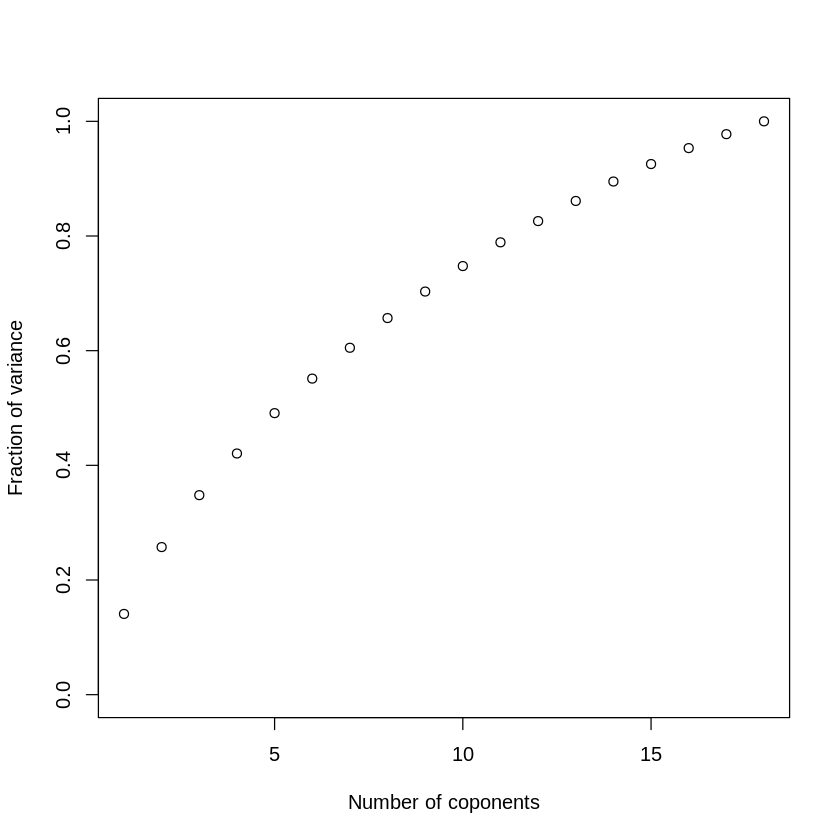

In [44]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [45]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [46]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Atti,15,0.41
EnergyC,11,0.38
SqftCate,4,0.37
OwnRent,3,0.28
Income,8,0.26
HouseholdS,5,0.24
HabitC,18,0.24
MC,12,0.22
HabitG,17,0.22
ComfNW,14,0.18
Political,6,0.15


In [47]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [48]:
#IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'SubNorm', 'HabitG', 'HabitC', 'Educ', 'PBC', 'Political', 'Gender', 'ComfNS', 'Latitude', 'Ethnic')

In [49]:
fmla <- as.formula(paste("HabitG",paste(IndepPred,collapse="+"),sep="~"));

In [50]:
table(data2[,"HabitG"])


 1.5    2 2.25  2.5 2.75    3 3.25  3.5 3.75    4 4.25  4.5 4.75    5 5.25  5.5 
   3    2    2    5    9   10   14   15   22   27   28   33   31   52   34   65 
5.75    6 6.25  6.5 6.75    7 
  43   50   46   33   23   50 

In [51]:
mod = lm(fmla,data=data2)
summary(mod)

Warning message in model.matrix.default(mt, mf, contrasts):
"the response appeared on the right-hand side and was dropped"Warning message in model.matrix.default(mt, mf, contrasts):
"problem with term 9 in model.matrix: no columns are assigned"


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.847 -0.647  0.195  0.767  3.196 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.54163    0.58086    6.10  2.0e-09 ***
Atti         0.09001    0.05097    1.77   0.0779 .  
EnergyC      0.04814    0.03942    1.22   0.2224    
SqftCate    -0.02834    0.04867   -0.58   0.5606    
OwnRent     -0.02451    0.09770   -0.25   0.8020    
Income      -0.03732    0.02509   -1.49   0.1374    
HouseholdS  -0.05968    0.04082   -1.46   0.1443    
HabitC       0.20620    0.03369    6.12  1.7e-09 ***
MC           0.23269    0.04424    5.26  2.0e-07 ***
ComfNW       0.03567    0.02726    1.31   0.1912    
Political   -0.06375    0.05647   -1.13   0.2594    
Educ        -0.12802    0.04207   -3.04   0.0025 ** 
Gender      -0.00481    0.09273   -0.05   0.9587    
Ethnic      -0.02788    0.11971   -0.23   0.8160    
ComfNS      -0.05047    0.03101   -1.63   0.1042    
SN           

In [52]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Atti,1,50.577,50.577,45.503,3.7e-11
EnergyC,1,3.098,3.098,2.787,9.6e-02
SqftCate,1,2.539,2.539,2.284,1.3e-01
OwnRent,1,0.113,0.113,0.101,7.5e-01
Income,1,8.856,8.856,7.968,4.9e-03
HouseholdS,1,2.670,2.670,2.402,1.2e-01
HabitC,1,57.289,57.289,51.541,2.2e-12
MC,1,32.422,32.422,29.169,9.7e-08
ComfNW,1,2.127,2.127,1.914,1.7e-01
Political,1,1.322,1.322,1.189,2.8e-01


In [53]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
  IncHomeS     Gender    OwnRent   SqftCate HouseholdS  Political     Ethnic 
      0.97       0.93       0.63       0.36       0.83       0.91       0.98 
    Income       Educ   Latitude    EnergyC         MC     ComfNS     ComfNW 
      0.75       0.98       1.00       0.51       0.80       0.95       0.98 
      Atti         SN     HabitG     HabitC 
      0.39       0.92       0.87       0.90 

Loadings:
           Factor1 Factor2
EnergyC     0.69          
Atti        0.78          
OwnRent             0.61  
SqftCate            0.80  
IncHomeS                  
Gender                    
HouseholdS          0.41  
Political                 
Ethnic                    
Income              0.50  
Educ                      
Latitude                  
MC          0.45          
ComfNS                    
ComfNW                    
SN                        
HabitG      0.36          
HabitC      0.30        

In [55]:
#model without age
IndepPred = c('Atti', 'EnergyC', 'SqftCate', 'OwnRent', 'MC', 'HouseholdS', 'Income', 'HabitC', 'Educ',  'Political', 'Gender', 'ComfNS', 'ComfNW', 'Latitude', 'Ethnic')
fmla <- as.formula(paste("HabitG",paste(IndepPred,collapse="+"),sep="~"));
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.766 -0.630  0.163  0.770  3.217 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.593217   0.580540    6.19  1.1e-09 ***
Atti         0.096519   0.050851    1.90   0.0582 .  
EnergyC      0.051411   0.039402    1.30   0.1925    
SqftCate    -0.027155   0.048716   -0.56   0.5775    
OwnRent     -0.018974   0.097744   -0.19   0.8461    
MC           0.234164   0.044279    5.29  1.8e-07 ***
HouseholdS  -0.054228   0.040714   -1.33   0.1834    
Income      -0.035143   0.025075   -1.40   0.1616    
HabitC       0.213549   0.033386    6.40  3.3e-10 ***
Educ        -0.128932   0.042119   -3.06   0.0023 ** 
Political   -0.063632   0.056534   -1.13   0.2608    
Gender       0.000346   0.092771    0.00   0.9970    
ComfNS      -0.048062   0.031003   -1.55   0.1216    
ComfNW       0.036460   0.027287    1.34   0.1820    
Latitude    -0.010222   0.008659   -1.18   0.2383  

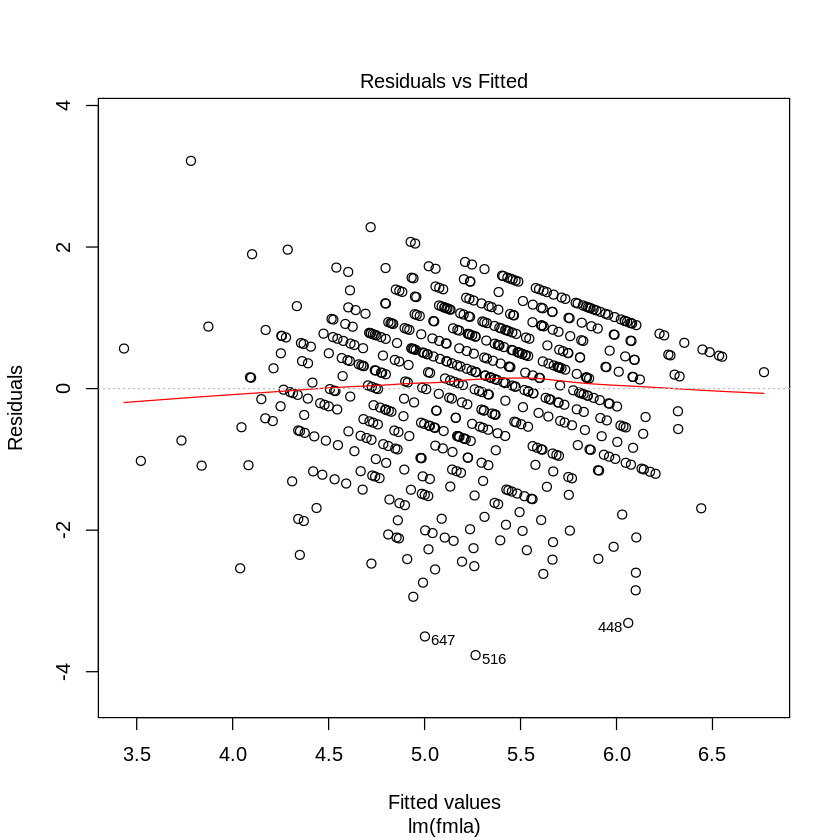

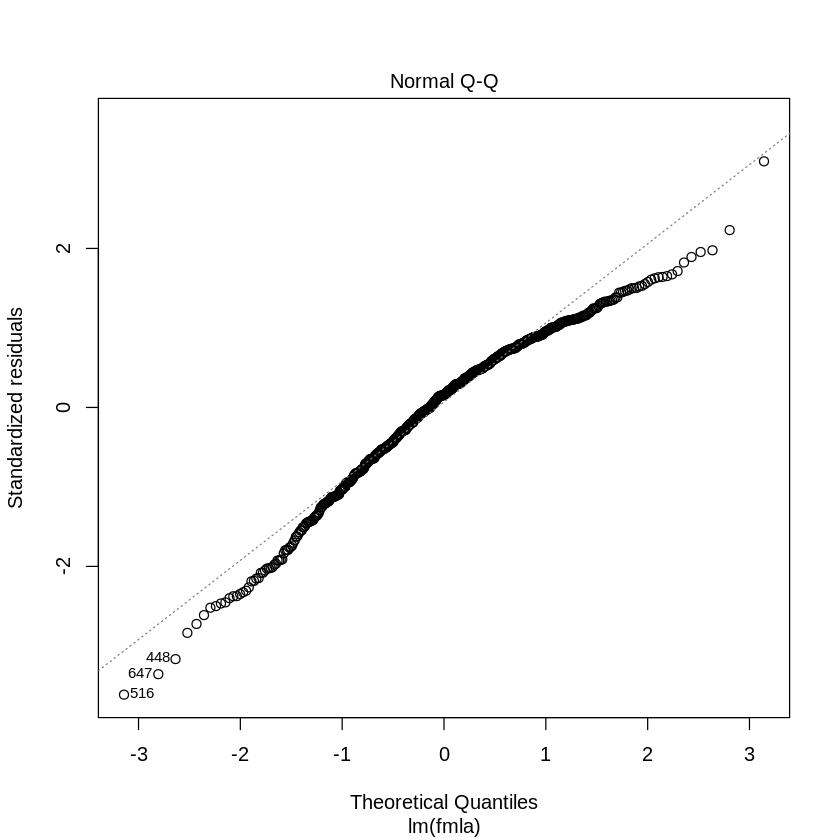

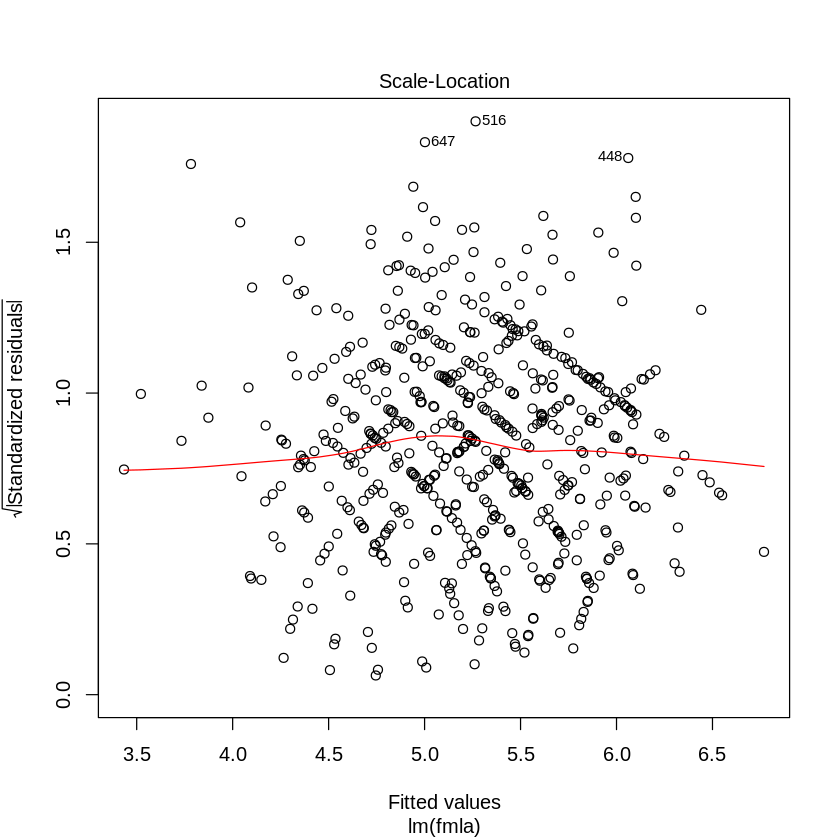

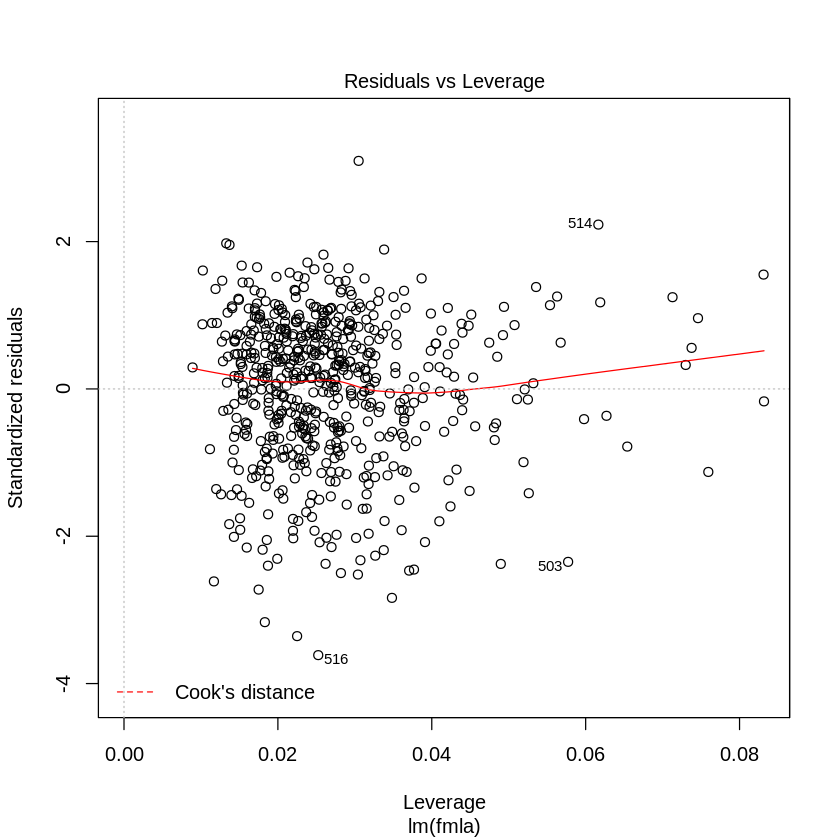

In [56]:
plot(mod)